# **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **CONNECT GOOGLE DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [4]:
path = "/content/grive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum03"

# **MEMBACA FILE CVS**

In [5]:
df = pd.read_csv(path + "/data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


# **INFORMASI DETAIL FILE**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


# **DATA PREROCESSING**

In [9]:
#Cek Missing Value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


# **CEK DAN HAPUS DATA DUPLICATE**

In [10]:
#Cek Duplicate
df.duplicated().sum()

np.int64(7308)

In [11]:
#Menghapus Data Duplicate
df = df.drop_duplicates()

In [12]:
#Cek ulang duplicate
df.duplicated().sum()

np.int64(0)

In [13]:
#Mengubah nama kolom
df = df.rename(columns={
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


# **DATA UNDERSTNDING**

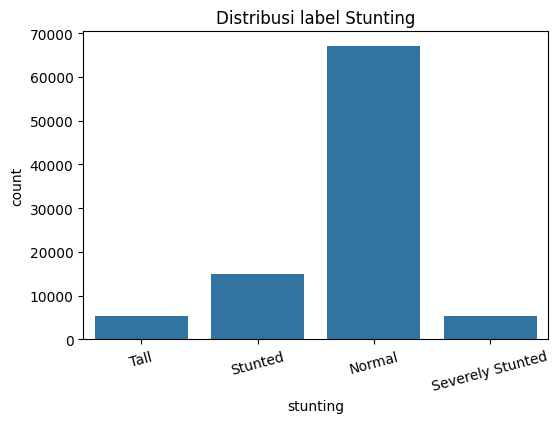

In [15]:
#Visualisasi Distribusi Label Target
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

# **ENCODING DATA KATEGORIKAL**

In [16]:
#Mapping Label -> Kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) #urutan kelas
df['stunting'] = stunting_cat.cat.codes #y numerik

#Fitur Ktegorikal Lain (jenis_kelamin, wasting) - kode juga
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


# **ANALISIS KORELASI**

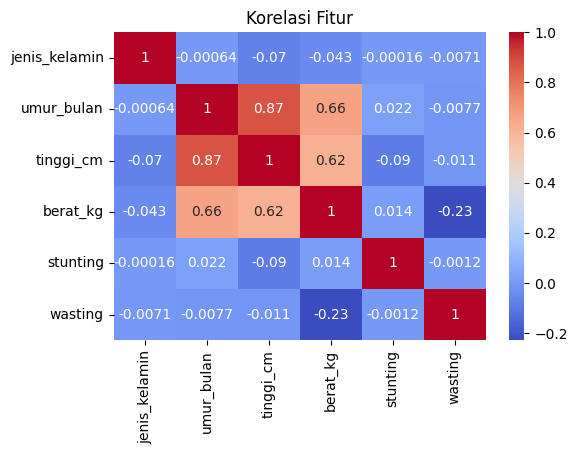

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

# **SPLITTING DATA**

In [19]:
#Memilih Fitur dan Target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

In [20]:
#Membagi Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)
len(X_train), len(X_test)

(74153, 18539)

# **MODEL DECISION TREE**

In [ ]:
#Mmebangun Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# **EVALUASI MODEL**

In [ ]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(
    y_test, y_pred, target_names=stunting_classes))

Akurasi: 78.4 %

Confusion Matrix: 
 [[13124     0   125   162]
 [  671    45   351     0]
 [ 1956     0  1052     0]
 [  739     0     0   314]]

Classification Report: 
                   precision    recall  f1-score   support

          Normal       0.80      0.98      0.88     13411
Severely Stunted       1.00      0.04      0.08      1067
         Stunted       0.69      0.35      0.46      3008
            Tall       0.66      0.30      0.41      1053

        accuracy                           0.78     18539
       macro avg       0.79      0.42      0.46     18539
    weighted avg       0.78      0.78      0.74     18539



# **VISUALISASI HASIL MODEL**

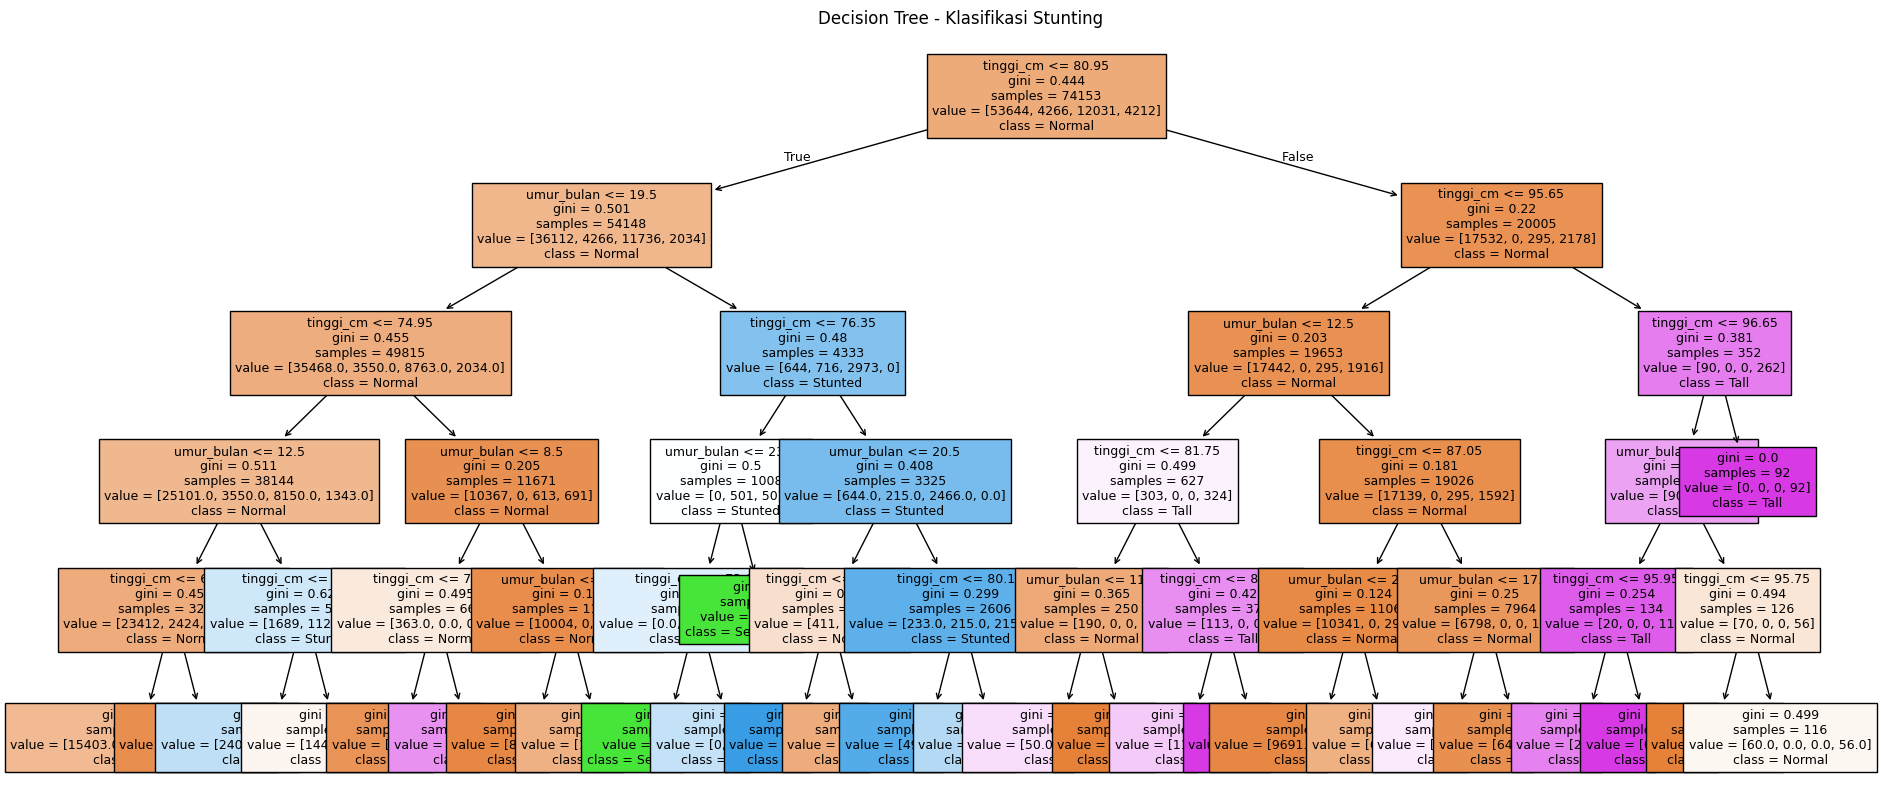

In [ ]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_cols,
    class_names=stunting_classes, #Kembali ke nama asli
    fontsize=9)
plt.title('Decision Tree - Klasifikasi Stunting')
plt.show()

# **FEATURE IMPORTANCE**

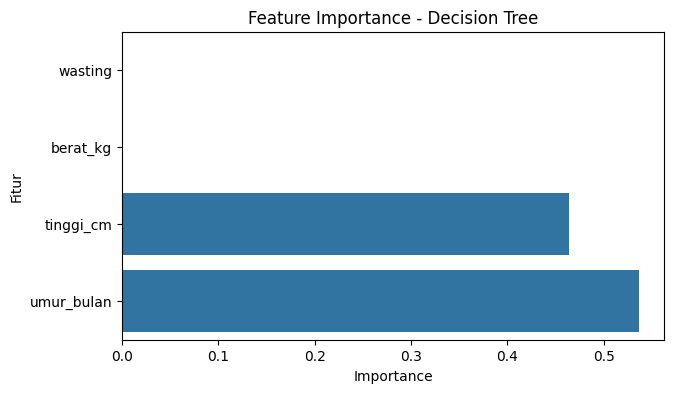

,0
wasting,0.000000
berat_kg,0.000000
tinggi_cm,0.463914
umur_bulan,0.536086


In [ ]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=True)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

imp

# **HYPERPARAMETER TUNING**

In [ ]:
scores = {}
for d in range(2, nine :=9):
  m = DecisionTreeClassifier(
      max_depth=d,
      random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

  scores
  best_d = max(scores, key=scores.get)
  print("Best depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best depth: 2 | Acc: 75.72 %
Best depth: 2 | Acc: 75.72 %
Best depth: 4 | Acc: 77.67 %
Best depth: 5 | Acc: 78.4 %
Best depth: 6 | Acc: 81.74 %
Best depth: 7 | Acc: 82.38 %
Best depth: 8 | Acc: 84.22 %
